In [1]:
import cubewalkers as cw
import cupy as cp
import pystablemotifs as psm
import pyboolnet as pbn

In [8]:
print('importing...')
rules_stf='''
Rho,	!PKA & p115RhoGEF & !p190RhoGAP & !Graf & !RhoGDI | !Rho & p115RhoGEF & !RhoGDI | Rho & !PKA & !p190RhoGAP & !Graf
DOCK180,	Crk & PIP3_345 & Cas
Src,	!(Src & Csk | !PTPa & !EGFR & !Gas & !alpha_sR & !PTP1b & !Gai | !PTPa & !EGFR & !Fak & !B_Arrestin & !Cas | !PTPa & !EGFR & !B_Arrestin & !PTP1b | !PTPa & !EGFR & !Gas & !Fak & !alpha_sR & !Gai & !Cas)
Trafs,	IL1_TNFR
DAG,	DAG & !DGK | !DAG & PLC_g & PIP2_45 | !DAG & PLC_B & PIP2_45 | !DGK & PLC_B & PIP2_45 | !DGK & PLC_g & PIP2_45
GCK,	Trafs
Talin,	!Src & Talin | !Talin & PIP2_45 | !Src & PIP2_45
Tiam,	!(!Src & !PKC & !CaMK | !PIP2_34 & !PIP3_345 | !Ras & !PIP2_45 & !Rap1)
MLCP,	!Raf & !PKA & !PAK & !RhoK & !PKC & !ILK | !Raf & PKA & !PAK & RhoK & !PKC & !ILK
Mekk1,	!(!Rho & !Trafs & !GCK & !Rac & !Cdc42 & !Grb2 & !Ras & !NIK | !Rho & !Trafs & !GCK & !Rac & !Cdc42 & !Ras & !NIK & !Shc | !Trafs & !GCK & !Rac & !Cdc42 & !Grb2 & !Ras & !Shc)
PA,	PLD
Mekk3,	Trafs & !Gab1 | Rac & !Gab1 | IL1_TNFR & !Gab1
ASK1,	Trx
MKPs,	SAPK & cAMP | cAMP & p38 | cAMP & Erk
Raf,	Raf & !PKA & !Akt & !Erk | Raf & Ras | Raf & PAK & !Akt & !Erk | Src & PAK & Ras & RKIP & Raf_Loc | Src & PAK & !Akt & RKIP & !Erk & Raf_Loc | Src & !Raf & PAK & RKIP & Raf_Loc
Ral,	!(!AND_34 & !CaM & !RalGDS)
Sek1,	ASK1 & MLK3 | ASK1 & Tpl2 | ASK1 & MLK2 | ASK1 & Mekk4 | Mekk3 & ASK1 | ASK1 & MLK1 | Mekk1 & ASK1 | ASK1 & Mekk2 | ASK1 & TAK1
Ga_1213,	!Ga_1213 & alpha_1213R & !Gbg_1213 | Ga_1213 & !p115RhoGEF & Gbg_1213
DGK,	!(!Src & !EGFR & !PKC | !Src & !DAG & !EGFR | !DAG & !PA & !EGFR | !PA & !EGFR & !PKC | !Ca & !EGFR & !PKC | !DAG & !Ca & !EGFR)
Rac,	Tiam & !Rac & PAK & Integrins & ECM | !Rac & Cdc42 & !Gbg_i & Pix_Cool & Integrins & !RhoGDI & ECM | PAK & !RalBP1 & !p190RhoGAP & Integrins & RasGRF_GRP & ECM | !RalBP1 & !p190RhoGAP & Integrins & !RhoGDI & RasGRF_GRP & ECM | DOCK180 & !Rac & PAK & Integrins & ECM | !Rac & Cdc42 & !Gbg_i & Pix_Cool & PAK & Integrins & ECM | !Rac & PAK & Integrins & RasGRF_GRP & ECM | Tiam & !Rac & Integrins & !RhoGDI & ECM | Tiam & PAK & !RalBP1 & !p190RhoGAP & Integrins & ECM | DOCK180 & !Rac & Integrins & !RhoGDI & ECM | !Rac & !Cdc42 & Gbg_i & Pix_Cool & PAK & Integrins & ECM | !Rac & Cdc42 & Pix_Cool & !PAK & Integrins & !RhoGDI & ECM | DOCK180 & PAK & !RalBP1 & !p190RhoGAP & Integrins & ECM | DOCK180 & !RalBP1 & !p190RhoGAP & Integrins & !RhoGDI & ECM | !Rac & Integrins & !RhoGDI & RasGRF_GRP & ECM | Tiam & !RalBP1 & !p190RhoGAP & Integrins & !RhoGDI & ECM
Raf_Rest,	Raf_Rest & !Raf_DeP | !Raf & !Raf_Rest | !Raf & !Raf_DeP
ARF,	!(!PIP3_345 & !PIP2_45)
PIP_4,	PIP_4 & !PI3K & !PI5K | !PIP_4 & PIP2_34 & PTEN | !PI3K & PIP2_34 & PTEN & !PI5K | !PIP_4 & PI4K | PI4K & !PI3K & !PI5K
SHP2,	Gab1
PTPa,	PKC
MKK7,	Mekk3 & ASK1 | ASK1 & MLK2 | ASK1 & MLK1 | ASK1 & Mekk2 | ASK1 & Mekk4 | ASK1 & MLK3 | Mekk1 & ASK1
Tpl2,	Trafs
Palpha_qR,	GRK & alpha_qR
Ca,	IP3R1 & !ExtPump
TAK1,	Tab_12
TAO_12,	Stress
Cdc42,	!Src & !Rac & !Cdc42 & Gbg_i & Pix_Cool & PAK | Cdc42 & Pix_Cool & !RhoGDI | !Rac & Gbg_i & Pix_Cool & PAK & !RhoGDI
PLC_g,	EGFR & Fak & PIP3_345 | !PA & EGFR & PIP3_345 | Src & EGFR & PIP3_345 | Src & !PA & !EGFR & Fak & !AA | Src & Fak & PIP3_345 | EGFR & PIP3_345 & !AA
MKK6,	ASK1 & PAK | ASK1 & MLK3 | ASK1 & Tpl2 | ASK1 & TAK1 | ASK1 & Mekk4 | ASK1 & TAO_12
EGFR,	Ca & alpha_qR & EGF | Ca & alpha_qR & PKC | !PKC & EGF | Ca & alpha_1213R & PKC | Ca & alpha_iR & EGF | Ca & alpha_iR & PKC | Ca & alpha_1213R & EGF
Gas,	Gas & Gbg_s & !RGS | !Gas & !Gbg_s & !PKA & alpha_sR
PLC_B,	!(!PLC_B & !Gaq | !Gbg_i & !Gaq | PKA & !Gaq)
MLK2,	Rac & SAPK | Cdc42 & SAPK
PLD,	!(!ARF & !Actin | !Rho & !Rac & !ARF & !Cdc42 & !PKC | !PIP3_345 & !PIP2_45)
SAPK,	!MKPs & MKK7 & !PP2A | !MKPs & Sek1 & !PP2A | Sek1 & !SAPK | MKK7 & !SAPK
Trx,	!(!Trafs & !Stress)
Mekk4,	!(!Rac & !Cdc42)
GRK,	Gbg_1213 & !RKIP & !Erk & PIP2_45 | Src & B_Arrestin & !RKIP & !Erk | Gbg_i & !RKIP & !Erk & PIP2_45 | Gbg_s & !RKIP & !Erk & PIP2_45 | Gbg_q & !RKIP & !Erk & PIP2_45
p90RSK,	!p90RSK & Erk & PDK1
PI4K,	!(!Rho & !ARF & !PKC & !Gaq & !Gai)
PI3K,	!(!Src & !Gbg_i & !Fak & !Ras & !Crk & !Gab1 | !EGFR & !Gbg_i & !Fak & !Ras & !Crk & !Gab1)
Grb2,	!(!Src & !EGFR & !Shc | !EGFR & !Fak & !Shc)
Gbg_i,	!(Gbg_i & !Gai | !alpha_iR & !Gai)
AND_34,	Cas
Gbg_s,	!(!Gas & Gbg_s | !Gas & !alpha_sR)
Palpha_1213R,	GRK & alpha_1213R
Pix_Cool,	PIP2_34 & B_Parvin | PIP3_345 & B_Parvin
Mek,	!(!Mekk1 & !Mekk3 & !Tpl2 & !Mekk2 | !Raf & !Tpl2 | Mek & PP2A)
PIP2_34,	PI4K & PI3K & !PTEN & !PI5K | PIP2_34 & !PTEN & !PI5K | PI4K & PI3K & !PIP2_34
CaM,	Ca
alpha_iR,	!(!alpha_iR & B_Arrestin & !alpha_iL | !alpha_iR & !Palpha_iR & !alpha_iL | B_Arrestin & Palpha_iR)
AC,	Gas & Gbg_i & Integrins & ECM
alpha_qR,	!(!alpha_qR & B_Arrestin & !alpha_qL | !alpha_qR & !Palpha_iR & !alpha_qL | B_Arrestin & Palpha_iR)
PKA,	!PP2A & cAMP & PDK1 | !PKA & cAMP & PDK1 | PKA & !PP2A & cAMP
alpha_1213R,	!(!alpha_1213R & B_Arrestin & !alpha_1213L | !Palpha_1213R & !alpha_1213R & !alpha_1213L | Palpha_1213R & B_Arrestin)
PAK,	Rac & Grb2 & !PKA | Src & Rac & !PKA & PAK & !PTP1b | Rac & !PKA & !Akt & Nck | Src & Cdc42 & !PKA & PAK & !PTP1b | Cdc42 & Grb2 & !PKA | Cdc42 & !PKA & !Akt & Nck
RhoK,	Rho
Akt,	Src & PIP2_34 & !Akt & ILK & CaMKK | Src & !PP2A & PIP3_345 & ILK & CaMKK | Src & PIP2_34 & !Akt & ILK & PDK1 | Src & PIP2_34 & !PP2A & ILK & PDK1 | Akt & !PP2A | Src & !Akt & PIP3_345 & ILK & PDK1 | Src & !Akt & PIP3_345 & ILK & CaMKK | Src & !PP2A & PIP3_345 & ILK & PDK1 | Src & PIP2_34 & !PP2A & ILK & CaMKK
Tab_12,	Trafs & !p38
Myosin,	!(MLCP & !PAK & !RhoK & !ILK & !MLCK | !CaM & !PAK & !RhoK & !Myosin & !ILK | MLCP & Myosin | MLCP & !CaM & !PAK & !RhoK & !ILK | !PAK & !RhoK & !Myosin & !ILK & !MLCK)
Actin,	Myosin & Arp_23
PP2A,	!EGFR
RalBP1,	Ral
MLK1,	!(!Rac & !Cdc42)
Fak,	Talin & Integrins & !PTEN | Talin & !Fak & Integrins | Src & Fak & !PTEN
Ras,	!(!SHP2 & !RasGRF_GRP & !Sos)
NIK,	!(!TAK1 & !Nck)
IP3R1,	!(Ca & IP3R1 & !IP3 | CaM & !PKA & !PP2A & IP3R1 & !IP3 | !Gbg_i & PP2A & IP3R1 & !IP3 | !Ca & !Gbg_i & PP2A & IP3R1 | !Gbg_i & CaM & PP2A & IP3R1 | !Gbg_i & !PKA & !IP3 | Ca & CaM & IP3R1 | !Ca & !Gbg_i & !PKA | !Gbg_i & CaM & !PKA & IP3R1)
cAMP,	cAMP & !PDE4 | AC & !PDE4
p115RhoGEF,	Ga_1213 & PIP3_345
MKK3,	ASK1 & Mekk2 | ASK1 & MLK3 | ASK1 & PAK | ASK1 & Tpl2 | Mekk3 & ASK1 | ASK1 & TAK1 | ASK1 & MLK2 | ASK1 & MLK1 | ASK1 & TAO_12 | ASK1 & Mekk4
MLK3,	!(!Rac & !Cdc42 & !IL1_TNFR)
p190RhoGAP,	Src & Fak | Src & !p120RasGAP | Src & !p190RhoGAP
Gbg_1213,	!(!Ga_1213 & Gbg_1213 | !Ga_1213 & !alpha_1213R)
Gbg_q,	!(Gbg_q & !Gaq | !alpha_qR & !Gaq)
Graf,	Src & Fak
PKC,	!Trx & !PP2A & PKC | DAG & Ca & !Trx & PKC_primed | DAG & Ca & !PKC & PKC_primed | Ca & !Trx & PKC_primed & AA | Ca & !PKC & PKC_primed & AA
Integrins,	!Src & Integrins & !ILK | Src & !Talin & !PP2A & !Integrins & !ILK & !ECM | Talin & !Integrins & !ILK & ECM | Talin & PP2A & !Integrins & ECM | !Src & Talin & !ILK & ECM
B_Arrestin,	!(!Palpha_qR & !Palpha_1213R & !Palpha_sR & !Palpha_iR)
RhoGDI,	!PKC & !PIP2_45 & !AA
RasGRF_GRP,	DAG & Cdc42 | Cdc42 & CaM
Mekk2,	EGFR & Grb2 & !Mekk2 | Src & EGFR & !Mekk2 | PLC_g & EGFR & !Mekk2 | EGFR & PI3K & !Mekk2
alpha_sR,	!(B_Arrestin & Palpha_sR | B_Arrestin & !alpha_sR & !alpha_sL | !alpha_sR & !Palpha_sR & !alpha_sL)
RalGDS,	alpha_1213R & !PKC & B_Arrestin & !PDK1 | alpha_qR & !PKC & B_Arrestin & !PIP3_345 | alpha_iR & !PKC & B_Arrestin & !PDK1 | alpha_iR & !PKC & B_Arrestin & !PIP3_345 | !PKC & B_Arrestin & alpha_sR & !PDK1 | !PKC & B_Arrestin & alpha_sR & !PIP3_345 | alpha_iR & !Ras & !PKC & B_Arrestin | alpha_qR & !PKC & B_Arrestin & !PDK1 | !Ras & !PKC & B_Arrestin & alpha_sR | alpha_qR & !Ras & !PKC & B_Arrestin | alpha_1213R & !Ras & !PKC & B_Arrestin | alpha_1213R & !PKC & B_Arrestin & !PIP3_345
p120RasGAP,	!Src & !Fak & PIP3_345 | !Src & !SHP2 & EGFR & !Fak | !Src & Ca & !Fak | !Src & !Fak & PIP2_45 | !Src & PIP2_34 & !Fak
PTEN,	Rho & !Src & Cdc42 & PI3K & Pix_Cool | Rho & Cdc42 & PI3K & Pix_Cool & !PTEN | !PTEN & Stress | !Src & Stress
RKIP,	PKC
Crk,	Src & !PTPPEST & Cas | Fak & !PTPPEST & Cas
PDE4,	B_Arrestin & !Erk | PKA & B_Arrestin
p38,	!MKPs & MKK6 & !PP2A | !MKPs & !PP2A & MKK3 | !MKPs & Sek1 & !PP2A
Erk,	!(!Mek & !Erk | !Mek & PP2A | MKPs & !Mek)
PIP3_345,	PIP2_34 & !PIP3_345 & PI5K | PI3K & !PIP3_345 & PIP2_45 | PI3K & !PTEN & PIP2_45 | PIP2_34 & !PTEN & PI5K
ILK,	PIP3_345
CaMKK,	CaM
WASP,	Cdc42 & Grb2 & Fak & !PTPPEST | Src & Cdc42 & !PTPPEST & Nck | Src & Cdc42 & !PTPPEST & PIP2_45 | Src & Cdc42 & Grb2 & !PTPPEST | Cdc42 & Fak & !PTPPEST & Nck | Cdc42 & Fak & !PTPPEST & PIP2_45
Palpha_sR,	GRK & alpha_sR
PLA2,	PIP3_345 & PIP2_45 & CaMK | Ca & Erk | Ca & CaMK | Erk & PIP3_345 & PIP2_45
B_Parvin,	ILK
Gaq,	alpha_qR & !Gbg_q & !Gaq | !PLC_B & Gbg_q & Gaq & !RGS
Palpha_iR,	GRK & alpha_iR
PTPPEST,	!PKA & !PKC & Integrins & ECM
IL1_TNFR,	IL1_TNF
RGS,	CaM & PIP3_345
PKC_primed,	!PKC & PKC_primed | !PKC_primed & PDK1 | !PKC & PDK1
Sos,	Grb2 & !Erk & PIP3_345 | Crk & PIP3_345 & Nck
PIP2_45,	!(!PI4K & !PTEN & !PIP2_45 | !PI4K & !PIP3_345 & !PIP2_45 | !PTEN & !PIP2_45 & !PI5K | !PIP3_345 & !PIP2_45 & !PI5K)
AA,	PLA2
Csk,	PKA & Cbp | Gbg_1213 & Cbp | Gbg_q & Cbp | Gbg_i & Cbp | !SHP2 & Cbp
Raf_Loc,	!Raf & Raf_Loc | !Raf & Ras & Raf_DeP | Ras & !Raf_Loc & Raf_DeP
PDK1,	!(!Src & !p90RSK)
Gab1,	!SHP2 & EGFR & PIP3_345 & Gab1 | !SHP2 & EGFR & Grb2 & PIP3_345 | !SHP2 & EGFR & Grb2 & !Gab1
Cbp,	Src & !SHP2
Rap1,	Src & PKA & cAMP & !Rap1 | Src & cAMP & CaMK & !Gai | Src & PKA & cAMP & !Gai | Src & cAMP & !Rap1 & CaMK
Vinc,	Src & Talin | Talin & Actin & !PIP2_45 & Vinc
IP3,	PLC_g & PIP2_45 | PLC_B & PIP2_45
MLCK,	CaM & !PKA & !PAK | !PKA & !PAK & Erk
PTP1b,	!Stress & !EGF | !EGFR & !Stress
CaMK,	CaM & CaMKK
PI5K,	!(!Talin & !PA & !ARF & !RhoK & !Fak | !Src & !Talin & !PA & !ARF & !RhoK | Talin & !PA & !ARF & !RhoK & !PI5K | !PA & !ARF & !RhoK & !Fak & !PI5K | !Src & !PA & !ARF & !RhoK & !PI5K | !Talin & !PA & !ARF & !RhoK & PI5K)
Gai,	!Gbg_i & PKA & !alpha_sR & !Gai & alpha_sL | !Gbg_i & alpha_iR & !Gai | Gbg_i & !RGS & Gai
Raf_DeP,	Raf_Rest & PP2A & !Raf_Loc | Raf_Rest & PP2A & !Raf_DeP | !Raf_Loc & Raf_DeP
Nck,	!(!EGFR & !Cas)
Cas,	Src & Fak & !PTPPEST | Src & Fak & !Cas
Shc,	Src & EGFR & Fak & !PTEN | Src & EGFR & Fak & !Shc
Arp_23,	WASP
alpha_qL,	alpha_qL
alpha_sL,	alpha_sL
IL1_TNF,	IL1_TNF
Stress,	Stress
alpha_1213L,	alpha_1213L
ExtPump,	ExtPump
ECM,	ECM
EGF,	EGF
alpha_iL,	alpha_iL
'''
primes_stf = psm.format.create_primes(rules_stf)
print('computing minimal trap spaces...')
ts_dicts = pbn.trap_spaces.compute_trap_spaces(primes_stf,'min',max_output=1000000)
print(len(ts_dicts))

importing...
computing minimal trap spaces...
375850


6.0


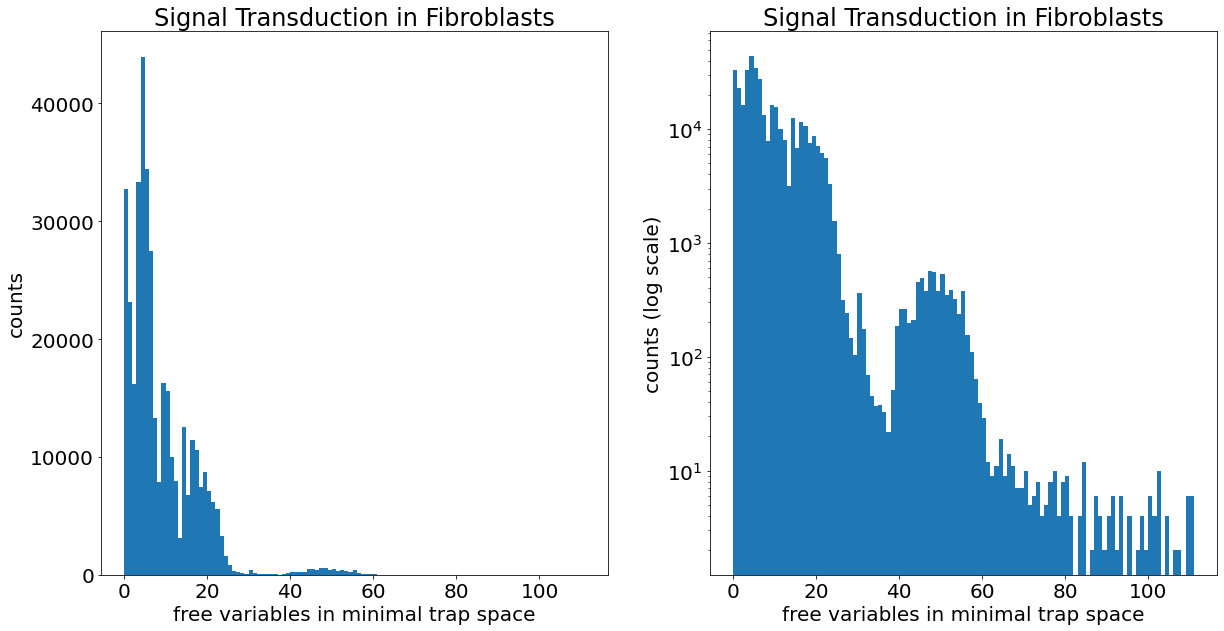

In [31]:
from statistics import median
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':20})
n_free = [len(primes_stf) - len(x) for x in ts_dicts]
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig.set_facecolor('white')
ax[0].hist(n_free,bins=max(n_free))
ax[0].set_title('Signal Transduction in Fibroblasts')
ax[0].set_xlabel('free variables in minimal trap space')
ax[0].set_ylabel('counts')

ax[1].hist(n_free,bins=max(n_free))
ax[1].set_yscale('log')
ax[1].set_title('Signal Transduction in Fibroblasts')
ax[1].set_xlabel('free variables in minimal trap space')
ax[1].set_ylabel('counts (log scale)')

print(median(n_free))

In [8]:
phase_switch_rules='''
Cdc20*= pAPC and (not Cdh1) and (not Mad2)
Cdc25A*= CyclinA and (not Cdh1)
Cdc25C*= CyclinA or (CyclinB and Cdk1)
Cdh1*= (not CyclinA) and (not (CyclinB and Cdk1))
Cdk1*= Cdc25C and (CyclinA or CyclinB) and (Cdk1 or (not Wee1))
CyclinA*= (Cdc25A or CyclinA) and (not (pAPC or (Cdh1 and UbcH10) ) )
CyclinB*= not (pAPC and Cdc20) and (not Cdh1)
Mad2*= not (pAPC and Cdc20) and CyclinB and Cdk1
pAPC*= (pAPC and Cdc20) or (CyclinB and Cdk1)
UbcH10*= (not Cdh1) or (UbcH10 and (Cdc20 or CyclinA or CyclinB))
Wee1*= not ((CyclinA or CyclinB) and Cdk1)
'''

phase_switch_model=cw.Model(phase_switch_rules,n_time_steps=10000,n_walkers=10000)
sfqc=phase_switch_model.quasicoherence(T_sample=10,fuzzy_coherence=True,maskfunction=cw.update_schemes.synchronous)
afqc=phase_switch_model.quasicoherence(T_sample=10,fuzzy_coherence=True,maskfunction=cw.update_schemes.asynchronous)
print('phase switch fragility (sync):',phase_switch_model.n_variables*(1-sfqc))
print('phase switch fragility (async):',phase_switch_model.n_variables*(1-afqc))


phase switch fragility (sync): 1.181418181818183
phase switch fragility (async): 1.201818181818183


In [2]:
CDK_Model_rules = '''
ACE2,	SFF
YHP1,	!(!MBF & !SBF)
YOX1,	MBF & SBF
MBF,	CLN3
SBF,	!YHP1 & !YOX1 & CLN3 | !YHP1 & !YOX1 & MBF
SWI5,	SFF
HCM1,	MBF & SBF
SFF,	SBF & HCM1
CLN3,	ACE2 & !YHP1 & !YOX1 & SWI5
'''

primes = psm.format.create_primes(CDK_Model_rules)
ar = psm.AttractorRepertoire.from_primes(primes)
print("asynchronous:") # according to pystablemotifs, there's only one attractor
ar.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='000001010'
for _ in range(10):
    s=pbn.state_transition_graphs.successor_synchronous(primes,s)
    print(s)


asynchronous:
There is 1 attractor.
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}


synchronous oscillation:
{'ACE2': 1, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 1, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 1, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 1, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 1, 'MBF': 0, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 1, 'YOX1': 1}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 1, 'SWI5': 0, 'YHP1': 1, 'YOX1': 0}
{'ACE2': 1, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 1, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 1, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 1, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 1, 'MBF': 0, 'SBF': 1, 'SFF': 0, 

In [3]:
CDK_Model_rules_alt = '''
ACE2,   SFF
YHP1,   MBF | SBF
YOX1,   MBF & SBF
MBF,    CLN3
SBF,    CLN3 & !YOX1 | CLN3 & !YHP1  |  MBF & !YOX1 | MBF & !YHP1
SWI5,   SFF
HCM1,   MBF & SBF
SFF,    SBF & HCM1
CLN3,   ACE2 & SWI5 & !YOX1  | ACE2 & SWI5 & !YHP1
'''

primes_alt = psm.format.create_primes(CDK_Model_rules_alt)
ar_alt = psm.AttractorRepertoire.from_primes(primes_alt)
print("asynchronous:") # according to pystablemotifs, there's only one attractor
ar_alt.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='000001010'
for _ in range(10):
    s=pbn.state_transition_graphs.successor_synchronous(primes_alt,s)
    print(s)


asynchronous:
There is 1 attractor.
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}


synchronous oscillation:
{'ACE2': 1, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 1, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 1, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 1, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 1, 'MBF': 0, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 1, 'YOX1': 1}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 1, 'SWI5': 0, 'YHP1': 1, 'YOX1': 0}
{'ACE2': 1, 'CLN3': 0, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 1, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 1, 'HCM1': 0, 'MBF': 0, 'SBF': 0, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 0, 'MBF': 1, 'SBF': 1, 'SFF': 0, 'SWI5': 0, 'YHP1': 0, 'YOX1': 0}
{'ACE2': 0, 'CLN3': 0, 'HCM1': 1, 'MBF': 0, 'SBF': 1, 'SFF': 0, 

In [4]:
rules_simple='''
T, Z
X, T
Y, Z
Z, X & ! Y
'''

primes_simple=psm.format.create_primes(rules_simple)
ar_simple = psm.AttractorRepertoire.from_primes(primes_simple)
print("asynchronous:")
ar_simple.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='0001'
for _ in range(6):
    s=pbn.state_transition_graphs.successor_synchronous(primes_simple,s)
    print(s)

asynchronous:
There is 1 attractor.
{'T': 0, 'X': 0, 'Y': 0, 'Z': 0}


synchronous oscillation:
{'T': 1, 'X': 0, 'Y': 1, 'Z': 0}
{'T': 0, 'X': 1, 'Y': 0, 'Z': 0}
{'T': 0, 'X': 0, 'Y': 0, 'Z': 1}
{'T': 1, 'X': 0, 'Y': 1, 'Z': 0}
{'T': 0, 'X': 1, 'Y': 0, 'Z': 0}
{'T': 0, 'X': 0, 'Y': 0, 'Z': 1}


In [5]:
Arabidopsis_CellCycle_rules='''
MYB77,	!RBR & E2Fb | !KRP1 & CYCD3_1 & E2Fb
KRP1,	!(SCF & CYCA2_3 & CDKB1_1 | !MYB77 & !MYB3R1_4)
CYCB1_1,	MYB77 & !APC_C | !RBR & !E2Fc & !APC_C & E2Fb | !APC_C & MYB3R1_4 | !KRP1 & CYCD3_1 & !E2Fc & !APC_C & E2Fb
E2Fe,	!(!MYB77 & E2Fc & !E2Fb | !MYB77 & RBR & !CYCD3_1 & E2Fc | !MYB77 & KRP1 & RBR & E2Fc)
RBR,	KRP1 & MYB3R1_4 | !CYCD3_1 & MYB3R1_4 | !RBR & !CYCD3_1 & E2Fa | KRP1 & !RBR & E2Fa
CYCD3_1,	!SCF
E2Fa,	!(!E2Fa & E2Fc | CYCA2_3 & CDKB1_1)
SCF,	!KRP1 & CYCD3_1 & !APC_C & E2Fb | !RBR & !APC_C & E2Fb | !APC_C & MYB3R1_4
E2Fc,	!(!E2Fa & !MYB3R1_4 | !KRP1 & CYCD3_1 & SCF | RBR & !MYB3R1_4)
APC_C,	MYB77 & !E2Fe | !E2Fe & MYB3R1_4 | !E2Fe & !RBR & E2Fa
MYB3R1_4,	!(!MYB77 & !CYCB1_1 | !MYB77 & !MYB3R1_4 | !MYB77 & KRP1)
CYCA2_3,	MYB77 & !APC_C | !APC_C & MYB3R1_4
E2Fb,	!RBR & E2Fa
CDKB1_1,	!(!MYB77 & E2Fc & !MYB3R1_4 | !MYB77 & !MYB3R1_4 & !E2Fb | !MYB77 & RBR & !CYCD3_1 & !MYB3R1_4 | !MYB77 & KRP1 & RBR & !MYB3R1_4)
'''
primes_acc = psm.format.create_primes(Arabidopsis_CellCycle_rules)
ar_acc = psm.AttractorRepertoire.from_primes(primes_acc)
print("asynchronous:") # according to pystablemotifs, there's only one attractor (this is exact)
ar_acc.summary()
print()

asynchronous:
There is 1 attractor.
{'APC_C': 'X', 'CDKB1_1': 'X', 'CYCA2_3': 'X', 'CYCB1_1': 'X', 'CYCD3_1': 'X', 'E2Fa': 'X', 'E2Fb': 'X', 'E2Fc': 'X', 'E2Fe': 'X', 'KRP1': 'X', 'MYB3R1_4': 'X', 'MYB77': 'X', 'RBR': 'X', 'SCF': 'X'}




In [6]:
rules_AK = '''AK* = X or Y
X* = AK
Y* = AK and not Z
Z* = Y'''
for delay in range(6):
    if delay > 0:
        rule_lines = rules_AK.split('\n')
        if delay == 1:
            rule_lines[-1] = f'D{delay}* = Y'
        else:
            rule_lines[-1] = f'D{delay}* = D{delay-1}'
        rule_lines.append(f'Z* = D{delay}')
        rules_AK = '\n'.join(rule_lines)
    
    print("Rules")
    print(rules_AK)
        
    model_AK = cw.Model(rules_AK)
    model_AK.n_time_steps = 10000
    model_AK.n_walkers = 4096

    model_AK.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.synchronous)
    sync_avg = cp.mean(model_AK.trajectories,axis=0)
    model_AK.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.asynchronous)
    async_avg = cp.mean(model_AK.trajectories,axis=0)
    
    print(f'sync:  {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model_AK.varnames,sync_avg)])}')
    print(f'async: {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model_AK.varnames,async_avg)])}')

    print('-'*10)
    print()

Rules
AK* = X or Y
X* = AK
Y* = AK and not Z
Z* = Y
sync:  {'AK': 0.63, 'X': 0.63, 'Y': 0.315, 'Z': 0.315}
async: {'AK': 0.625, 'X': 0.625, 'Y': 0.312, 'Z': 0.312}
----------

Rules
AK* = X or Y
X* = AK
Y* = AK and not Z
D1* = Y
Z* = D1
sync:  {'AK': 0.626, 'X': 0.626, 'Y': 0.439, 'D1': 0.439, 'Z': 0.44}
async: {'AK': 0.623, 'X': 0.623, 'Y': 0.312, 'D1': 0.311, 'Z': 0.311}
----------

Rules
AK* = X or Y
X* = AK
Y* = AK and not Z
D1* = Y
D2* = D1
Z* = D2
sync:  {'AK': 0.622, 'X': 0.622, 'Y': 0.311, 'D1': 0.311, 'D2': 0.311, 'Z': 0.311}
async: {'AK': 0.625, 'X': 0.625, 'Y': 0.313, 'D1': 0.312, 'D2': 0.313, 'Z': 0.312}
----------

Rules
AK* = X or Y
X* = AK
Y* = AK and not Z
D1* = Y
D2* = D1
D3* = D2
Z* = D3
sync:  {'AK': 0.619, 'X': 0.619, 'Y': 0.435, 'D1': 0.435, 'D2': 0.435, 'D3': 0.435, 'Z': 0.435}
async: {'AK': 0.622, 'X': 0.622, 'Y': 0.311, 'D1': 0.31, 'D2': 0.311, 'D3': 0.311, 'Z': 0.312}
----------

Rules
AK* = X or Y
X* = AK
Y* = AK and not Z
D1* = Y
D2* = D1
D3* = D2
D4* = D3
Z*

In [7]:
rules_AK = '''AK*=!AK
Y* = AK and not Z
Z* = Y'''
for delay in range(6):
    if delay > 0:
        rule_lines = rules_AK.split('\n')
        if delay == 1:
            rule_lines[-1] = f'D{delay}* = Y'
        else:
            rule_lines[-1] = f'D{delay}* = D{delay-1}'
        rule_lines.append(f'Z* = D{delay}')
        rules_AK = '\n'.join(rule_lines)
    
    print("Rules")
    print(rules_AK)
        
    model_AK = cw.Model(rules_AK)
    model_AK.n_time_steps = 10000
    model_AK.n_walkers = 4096

    model_AK.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.synchronous)
    sync_avg = cp.mean(model_AK.trajectories,axis=0)
    model_AK.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.asynchronous)
    async_avg = cp.mean(model_AK.trajectories,axis=0)
    
    print(f'sync:  {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model_AK.varnames,sync_avg)])}')
    print(f'async: {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model_AK.varnames,async_avg)])}')

    print('-'*10)
    print()

Rules
AK*=!AK
Y* = AK and not Z
Z* = Y
sync:  {'AK': 0.5, 'Y': 0.25, 'Z': 0.25}
async: {'AK': 0.5, 'Y': 0.321, 'Z': 0.321}
----------

Rules
AK*=!AK
Y* = AK and not Z
D1* = Y
Z* = D1
sync:  {'AK': 0.5, 'Y': 0.5, 'D1': 0.5, 'Z': 0.5}
async: {'AK': 0.501, 'Y': 0.33, 'D1': 0.329, 'Z': 0.329}
----------

Rules
AK*=!AK
Y* = AK and not Z
D1* = Y
D2* = D1
Z* = D2
sync:  {'AK': 0.5, 'Y': 0.25, 'D1': 0.25, 'D2': 0.25, 'Z': 0.25}
async: {'AK': 0.5, 'Y': 0.332, 'D1': 0.332, 'D2': 0.333, 'Z': 0.334}
----------

Rules
AK*=!AK
Y* = AK and not Z
D1* = Y
D2* = D1
D3* = D2
Z* = D3
sync:  {'AK': 0.5, 'Y': 0.5, 'D1': 0.5, 'D2': 0.5, 'D3': 0.5, 'Z': 0.5}
async: {'AK': 0.5, 'Y': 0.333, 'D1': 0.333, 'D2': 0.334, 'D3': 0.334, 'Z': 0.333}
----------

Rules
AK*=!AK
Y* = AK and not Z
D1* = Y
D2* = D1
D3* = D2
D4* = D3
Z* = D4
sync:  {'AK': 0.5, 'Y': 0.25, 'D1': 0.25, 'D2': 0.25, 'D3': 0.25, 'D4': 0.25, 'Z': 0.25}
async: {'AK': 0.5, 'Y': 0.332, 'D1': 0.332, 'D2': 0.332, 'D3': 0.332, 'D4': 0.333, 'Z': 0.333}
----

In [8]:
rules = '''
AK,     PLK1 & AKP
AKP,    !PP2A
CDK,    !CYT & (AK | PLK1)
CYT,    CDK
PLK1,   AK
PP2A,   !AK & !CDK & ! CYT
'''
print("RULES")
print(rules)
primes = psm.format.create_primes(rules)
ar = psm.AttractorRepertoire.from_primes(primes)
print("asynchronous:") # according to pystablemotifs, there's only one attractor (this is exact)
ar.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='010110'
for _ in range(5):
    s=pbn.state_transition_graphs.successor_synchronous(primes,s)
    print(s)
print()

print("node average values:")
model = cw.Model(rules)
model.n_time_steps=10000
model.n_walkers=4096
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.synchronous)
sync_avg = cp.mean(model.trajectories,axis=0)
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.asynchronous)
async_avg = cp.mean(model.trajectories,axis=0)
print(f'sync:  {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,sync_avg)])}')
print(f'async: {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,async_avg)])}')

RULES

AK,     PLK1 & AKP
AKP,    !PP2A
CDK,    !CYT & (AK | PLK1)
CYT,    CDK
PLK1,   AK
PP2A,   !AK & !CDK & ! CYT

asynchronous:
There are 2 attractors.
{'AK': 0, 'AKP': 0, 'CDK': 0, 'CYT': 0, 'PLK1': 0, 'PP2A': 1}

{'AK': 1, 'AKP': 1, 'CDK': 'X', 'CYT': 'X', 'PLK1': 1, 'PP2A': 0}


synchronous oscillation:
{'AK': 1, 'AKP': 1, 'CDK': 0, 'CYT': 0, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'AKP': 1, 'CDK': 1, 'CYT': 0, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'AKP': 1, 'CDK': 1, 'CYT': 1, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'AKP': 1, 'CDK': 0, 'CYT': 1, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'AKP': 1, 'CDK': 0, 'CYT': 0, 'PLK1': 0, 'PP2A': 0}

node average values:
sync:  {'AK': 0.157, 'AKP': 0.251, 'CDK': 0.125, 'CYT': 0.125, 'PLK1': 0.157, 'PP2A': 0.749}
async: {'AK': 0.323, 'AKP': 0.323, 'CDK': 0.162, 'CYT': 0.162, 'PLK1': 0.323, 'PP2A': 0.677}


In [9]:
rules = '''
AK,     PLK1 & AKP
AKP,    !PP2A
CDK,    !CDK & (AK | PLK1)
PLK1,   AK
PP2A,   !AK & !CDK
'''
print("RULES")
print(rules)
primes = psm.format.create_primes(rules)
ar = psm.AttractorRepertoire.from_primes(primes)
print("asynchronous:") # according to pystablemotifs, there's only one attractor (this is exact)
ar.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='01110'
for _ in range(5):
    s=pbn.state_transition_graphs.successor_synchronous(primes,s)
    print(s)
print()

print("node average values:")
model = cw.Model(rules)
model.n_time_steps=10000
model.n_walkers=4096
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.synchronous)
sync_avg = cp.mean(model.trajectories,axis=0)
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.asynchronous)
async_avg = cp.mean(model.trajectories,axis=0)
print(f'sync:  {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,sync_avg)])}')
print(f'async: {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,async_avg)])}')

RULES

AK,     PLK1 & AKP
AKP,    !PP2A
CDK,    !CDK & (AK | PLK1)
PLK1,   AK
PP2A,   !AK & !CDK

asynchronous:
There are 2 attractors.
{'AK': 0, 'AKP': 0, 'CDK': 0, 'PLK1': 0, 'PP2A': 1}

{'AK': 1, 'AKP': 1, 'CDK': 'X', 'PLK1': 1, 'PP2A': 0}


synchronous oscillation:
{'AK': 1, 'AKP': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'AKP': 1, 'CDK': 1, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'AKP': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'AKP': 1, 'CDK': 1, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'AKP': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}

node average values:
sync:  {'AK': 0.15, 'AKP': 0.241, 'CDK': 0.12, 'PLK1': 0.15, 'PP2A': 0.759}
async: {'AK': 0.301, 'AKP': 0.301, 'CDK': 0.151, 'PLK1': 0.301, 'PP2A': 0.699}


In [10]:
rules = '''
AK,     PLK1 & !PP2A
CDK,    !CDK & (AK | PLK1)
PLK1,   AK
PP2A,   !AK & !CDK
'''
print("RULES")
print(rules)
primes = psm.format.create_primes(rules)
ar = psm.AttractorRepertoire.from_primes(primes)
print("asynchronous:") # according to pystablemotifs, there's only one attractor (this is exact)
ar.summary()
print()

print("synchronous oscillation:") # according to cubewalkers, this has basin ~20-25% of the statespace
s='0110'
for _ in range(5):
    s=pbn.state_transition_graphs.successor_synchronous(primes,s)
    print(s)
print()

print("node average values:")
model = cw.Model(rules)
model.n_time_steps=10000
model.n_walkers=4096
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.synchronous)
sync_avg = cp.mean(model.trajectories,axis=0)
model.simulate_ensemble(T_window=1000,averages_only=True,maskfunction=cw.update_schemes.asynchronous)
async_avg = cp.mean(model.trajectories,axis=0)
print(f'sync:  {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,sync_avg)])}')
print(f'async: {dict([(n,float(str(cp.round(v,3)))) for n,v in zip(model.varnames,async_avg)])}')

RULES

AK,     PLK1 & !PP2A
CDK,    !CDK & (AK | PLK1)
PLK1,   AK
PP2A,   !AK & !CDK

asynchronous:
There are 2 attractors.
{'AK': 0, 'CDK': 0, 'PLK1': 0, 'PP2A': 1}

{'AK': 1, 'CDK': 'X', 'PLK1': 1, 'PP2A': 0}


synchronous oscillation:
{'AK': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'CDK': 1, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}
{'AK': 0, 'CDK': 1, 'PLK1': 1, 'PP2A': 0}
{'AK': 1, 'CDK': 0, 'PLK1': 0, 'PP2A': 0}

node average values:
sync:  {'AK': 0.376, 'CDK': 0.312, 'PLK1': 0.376, 'PP2A': 0.497}
async: {'AK': 0.368, 'CDK': 0.184, 'PLK1': 0.368, 'PP2A': 0.632}
